In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x, y_true = make_blobs(n_samples=300,centers = 3,cluster_std = 0.50,random_state = 15)

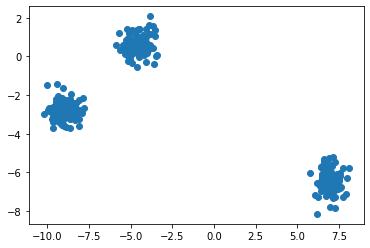

In [3]:
plt.scatter(x[:,0],x[:,1])

In [4]:
k = 3
centroids = np.zeros((k,np.shape(x)[1]))

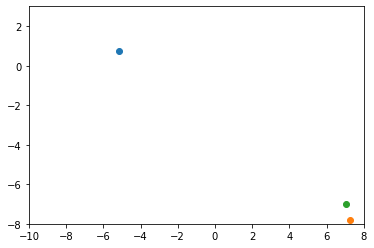

In [5]:
for i in range(k):
    centroids[i,:] = x[(np.random.randint(np.shape(x)[0])),:]
    #centroids[i,:] = x[i,:]
    plt.scatter(centroids[i,0],centroids[i,1])
    plt.xlim(-10,8)
    plt.ylim(-8,3)

In [6]:
for iter in range(1000):
    classification = []
    d = {}
    for i in range(k):
        d[i] = []
        
    for data in x:
        distance = []
        for i in range(k):
            distance.append(sum((data - centroids[i,:])**2)**0.5)
    
        idx = distance.index(min(distance))
        d[idx].append(data)
        classification.append(idx)
    for i in range(k):
        centroids[i,:] = np.average(d[i], axis = 0)

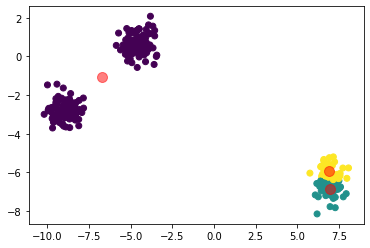

In [7]:
plt.scatter(x[:,0],x[:,1],c = classification)

for i in range(k):
    plt.scatter(centroids[i,0],centroids[i,1],c = 'red', s = 100, alpha = 0.5)

In [8]:
print(classification)

[0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0]


In [9]:
TWCSS = []
clusters = []
for k in range(1,20):
  WCSS = []
  centroids = np.zeros((k,np.shape(x)[1]))
  for i in range(k):
    #centroids[i,:] = x[(np.random.randint(np.shape(x)[0])),:]
    centroids[i,:] = x[i,:]
        
  for iter in range(100):
    classification = []
    d = {}
    for i in range(k):
      d[i] = []

    for data in x:
      distance = []
      for i in range(k):
        distance.append(sum((data - centroids[i,:])**2)**0.5)

      idx = distance.index(min(distance))
      d[idx].append(data)
      classification.append(idx)
    for i in range(k):
      centroids[i,:] = np.average(d[i], axis = 0)
      WCSS.append(np.linalg.norm(centroids[i,:]-d[i]))
  TWCSS.append(sum(WCSS))
  clusters.append(k)

In [10]:
print(clusters)
print(TWCSS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[12674.139748413487, 4848.884573138268, 2232.750920320739, 2176.300187376561, 2272.183544318316, 2310.790372039099, 2317.003628965753, 2350.8433153111414, 2392.119435215396, 2356.470801437596, 2364.3339991416715, 2377.7197783975216, 2388.5472081157845, 2388.7974429734772, 2407.6571009074473, 2445.531901156185, 2456.797845695563, 2461.1615723460304, 2470.670414672936]


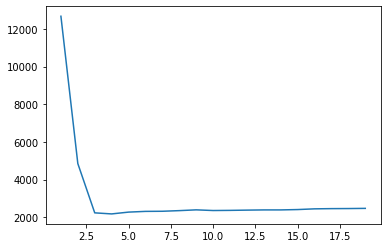

In [11]:
plt.plot(clusters, TWCSS)